<a href="https://colab.research.google.com/github/sashwot10/5CS037/blob/main/worksheet6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
def logistic_function(x):
    import numpy as np
    return 1 / (1 + np.exp(-x))

In [33]:
import numpy as np

def test_logistic_function():
    x_scalar = 0
    expected_output_scalar = round(1 / (1 + np.exp(0)), 3)
    assert round(logistic_function(x_scalar), 3) == expected_output_scalar

    x_pos = 2
    expected_output_pos = round(1 / (1 + np.exp(-2)), 3)
    assert round(logistic_function(x_pos), 3) == expected_output_pos

    x_neg = -3
    expected_output_neg = round(1 / (1 + np.exp(3)), 3)
    assert round(logistic_function(x_neg), 3) == expected_output_neg

    x_array = np.array([0, 2, -3])
    expected_output_array = np.array([0.5, 0.881, 0.047])
    assert np.all(np.round(logistic_function(x_array), 3) == expected_output_array)

    print("All tests passed!")

test_logistic_function()

All tests passed!


In [34]:
def log_loss(y_true, y_pred):
    import numpy as np
    y_pred = np.clip(y_pred, 1e-10, 1 - 1e-10)
    loss = -(y_true * np.log(y_pred)) - ((1 - y_true) * np.log(1 - y_pred))
    return loss

In [35]:
def test_log_loss():
    import numpy as np

    assert np.isclose(log_loss(1, 1), 0.0)
    assert np.isclose(log_loss(0, 0), 0.0)

    y_true, y_pred = 1, 0.8
    expected = -(1 * np.log(0.8))
    assert np.isclose(log_loss(y_true, y_pred), expected)

    y_true, y_pred = 0, 0.2
    expected = -(1 * np.log(0.8))
    assert np.isclose(log_loss(y_true, y_pred), expected)

    print("All tests passed!")

test_log_loss()

All tests passed!


In [36]:
def cost_function(y_true, y_pred):
    import numpy as np
    assert len(y_true) == len(y_pred)
    n = len(y_true)
    loss_vec = log_loss(y_true, y_pred)
    cost = np.sum(loss_vec) / n
    return cost

In [37]:
import numpy as np

def test_cost_function():
    y_true = np.array([1, 0, 1])
    y_pred = np.array([0.9, 0.1, 0.8])

    expected_cost = (
        -(np.log(0.9)) -
        (np.log(0.9)) -
        (np.log(0.8))
    ) / 3

    result = cost_function(y_true, y_pred)
    assert np.isclose(result, expected_cost, atol=1e-6)
    print("Test passed!")

test_cost_function()

Test passed!


In [38]:
def costfunction_logreg(X, y, w, b):
    import numpy as np
    n, d = X.shape
    assert len(y) == n
    assert len(w) == d

    z = np.dot(X, w) + b
    y_pred = logistic_function(z)
    cost = cost_function(y, y_pred)
    return cost

In [39]:
import numpy as np

X = np.array([[10, 20], [-10, 10]])
y = np.array([1, 0])
w = np.array([0.5, 1.5])
b = 1

print(costfunction_logreg(X, y, w, b))

5.500008350834906


In [40]:
def compute_gradient(X, y, w, b):
    import numpy as np
    n, d = X.shape

    z = np.dot(X, w) + b
    y_pred = logistic_function(z)

    grad_w = -(1 / n) * np.dot(X.T, (y - y_pred))
    grad_b = -(1 / n) * np.sum(y - y_pred)

    return grad_w, grad_b

In [41]:
X = np.array([[10, 20], [-10, 10]])
y = np.array([1, 0])
w = np.array([0.5, 1.5])
b = 1

grad_w, grad_b = compute_gradient(X, y, w, b)
print("grad_w:", grad_w)
print("grad_b:", grad_b)

grad_w: [-4.99991649  4.99991649]
grad_b: 0.4999916492890759


In [51]:
def gradient_descent(X, y, w, b, alpha, n_iter, show_cost=False, show_params=True):
    cost_history = []
    params_history = []

    for i in range(n_iter):
        grad_w, grad_b = compute_gradient(X, y, w, b)
        w -= alpha * grad_w
        b -= alpha * grad_b

        cost = costfunction_logreg(X, y, w, b)
        cost_history.append(cost)
        params_history.append((w.copy(), b))

        if show_cost and (i % 100 == 0 or i == n_iter - 1):
            print(f"Iteration {i}: Cost = {cost:.6f}")
        if show_params and (i % 100 == 0 or i == n_iter - 1):
            print(f"Iteration {i}: w = {w}, b = {b:.6f}")

    return w, b, cost_history, params_history

In [49]:
def gradient_descent(X, y, w, b, alpha, n_iter, show_cost=False, show_params=True):
    import numpy as np
    cost_history = []
    params_history = []

    for i in range(n_iter):
        grad_w, grad_b = compute_gradient(X, y, w, b)

        w = w - alpha * grad_w
        b = b - alpha * grad_b

        cost = costfunction_logreg(X, y, w, b)

        cost_history.append(cost)
        params_history.append((w.copy(), b))

    return w, b, cost_history, params_history

In [44]:
def prediction(X, w, b, threshold=0.5):
    z = np.dot(X, w) + b
    y_prob = logistic_function(z)
    y_pred = (y_prob >= threshold).astype(int)
    return y_pred

In [45]:
def test_prediction():
    X_test = np.array([[0.5, 1.0], [1.5, -0.5], [-0.5, -1.0]])
    w_test = np.array([1.0, -1.0])
    b_test = 0.0

    expected_output = np.array([0, 1, 1])
    y_pred = prediction(X_test, w_test, b_test)

    assert np.array_equal(y_pred, expected_output)
    print("Test passed!")

test_prediction()

Test passed!


In [54]:
X = np.array([[0.1, 0.2], [-0.1, 0.1]])
y = np.array([1, 0])
w = np.zeros(2)
b = 0.0
alpha = 0.1
n_iter = 1000

w_out, b_out, cost_history, params_history = gradient_descent(
    X, y, w, b, alpha, n_iter, show_cost=False, show_params=False
)

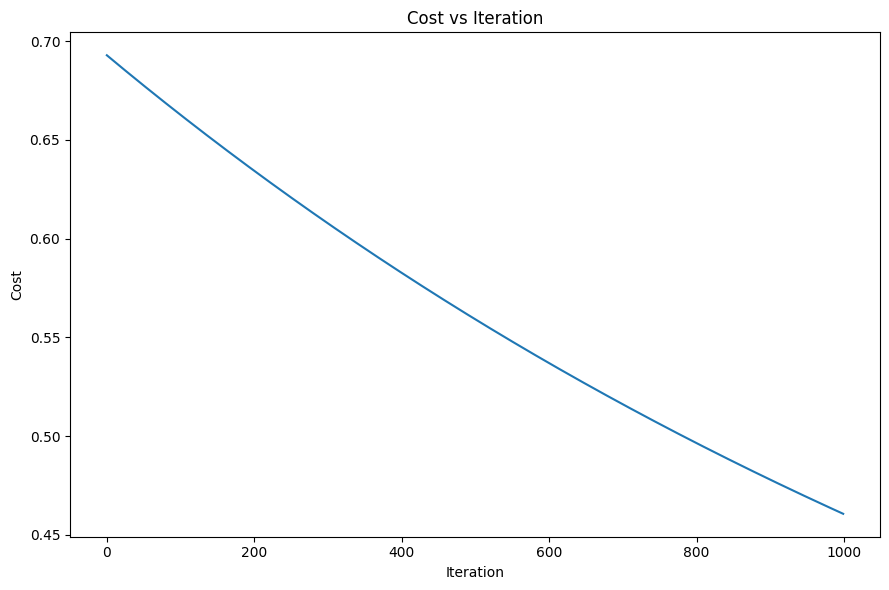

In [55]:
import matplotlib.pyplot as plt

plt.figure(figsize=(9, 6))
plt.plot(cost_history)
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.title("Cost vs Iteration")
plt.tight_layout()
plt.show()